Hansindu K.A.A.

210204R

[GitHub Link](https://github.com/AchiraHansindu/EN3160-Image-Processing-and-Machine-Vision)

Question 1

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/20, Loss: 0.9769136370420456
Epoch 2/20, Loss: 0.9498318123817444
Epoch 3/20, Loss: 0.9361000088453293
Epoch 4/20, Loss: 0.9275534020662308
Epoch 5/20, Loss: 0.9216159341335297
Epoch 6/20, Loss: 0.9172107254266739
Epoch 7/20, Loss: 0.91379822909832
Epoch 8/20, Loss: 0.9110715073347092
Epoch 9/20, Loss: 0.9088427208065987
Epoch 10/20, Loss: 0.9069898906350136
Epoch 11/20, Loss: 0.9054295436143875
Epoch 12/20, Loss: 0.9041016433238983
Epoch 13/20, Loss: 0.9029626584649086
Epoch 14/20, Loss: 0.9019794136285781
Epoch 15/20, Loss: 0.9011251618266105
Epoch 16/20, Loss: 0.9003798381686211
Epoch 17/20, Loss: 0.8997271504998207
Epoch 18/20, Loss: 0.8991536787748337
Epoch 19/20, Loss: 0.8986480434536934
Epoch 20/20, Loss: 0.8982013369202614


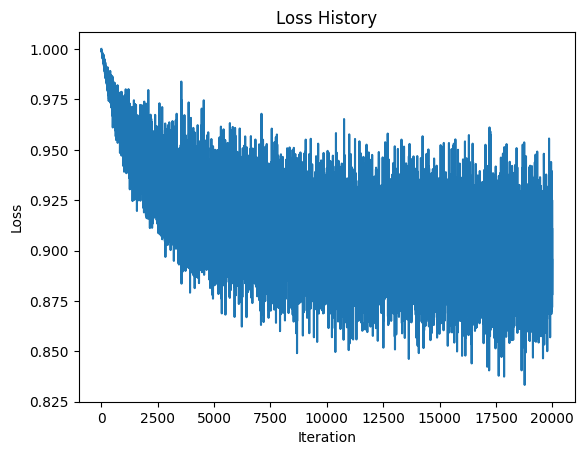

Training accuracy: 32.23%
Test accuracy: 32.43%


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 50

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
K = 10  # Output size (number of classes in CIFAR-10)
std = 1e-5

# Initialize weights and biases
w = torch.randn(Din, K) * std  # One layer: directly map input to output
b = torch.zeros(K)

# Hyperparameters
iterations = 20
lr = 2e-6  # Learning rate
lr_decay = 0.9  # Learning rate decay
reg = 0  # Regularization
loss_history = []

# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)
        y_train_onehot = nn.functional.one_hot(labels, K).float()  # Convert labels to one-hot encoding

        # Forward pass
        y_pred = x_train.mm(w) + b  # Output layer activation

        # Loss calculation (Mean Squared Error with regularization)
        loss = (1 / Ntr) * torch.sum((y_pred - y_train_onehot) ** 2) + reg * torch.sum(w ** 2)
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        dy_pred = (2.0 / Ntr) * (y_pred - y_train_onehot)
        dw = x_train.t().mm(dy_pred) + reg * w
        db = dy_pred.sum(dim=0)

        # Parameter update
        w -= lr * dw
        b -= lr * db

    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t + 1}/{iterations}, Loss: {running_loss / len(trainloader)}")

    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        y_train_onehot = nn.functional.one_hot(labels, K).float()

        # Forward pass
        y_train_pred = x_train.mm(w) + b
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        y_test_onehot = nn.functional.one_hot(labels, K).float()

        # Forward pass
        y_test_pred = x_test.mm(w) + b
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")

Adjustments to the Network

1. Network Architecture: We added a hidden layer with 100 neurons and a sigmoid activation, allowing the model to capture more complex patterns.
2. Loss Function: Cross-Entropy Loss was chosen for improved performance in multi-class classification.
3. Training Duration: The model runs for 10 epochs, with learning rate decay applied each epoch to enhance convergence.

Using device: cpu
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Loss: 1.758718589064561
Epoch 2/10, Loss: 1.6335336342882973
Epoch 3/10, Loss: 1.5781789087593288
Epoch 4/10, Loss: 1.5347866486908148
Epoch 5/10, Loss: 1.492203707162646
Epoch 6/10, Loss: 1.4618109658370015
Epoch 7/10, Loss: 1.4321452542443498
Epoch 8/10, Loss: 1.4027820419441486
Epoch 9/10, Loss: 1.37964731660777
Epoch 10/10, Loss: 1.350964495980122


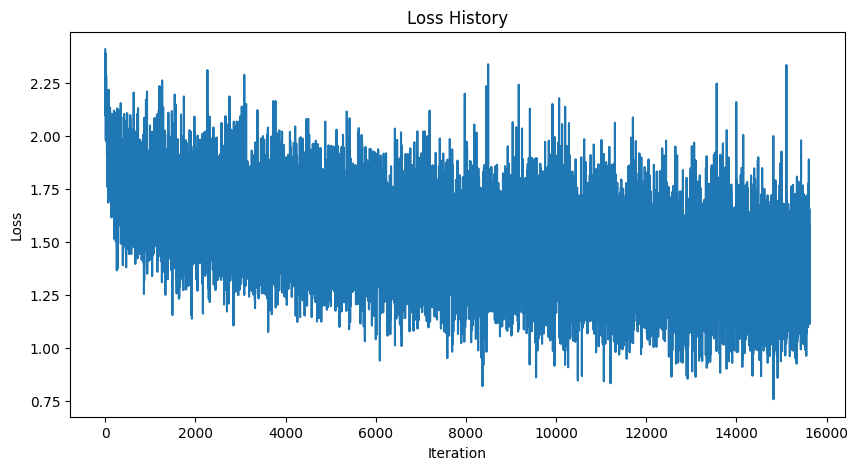

Training accuracy: 55.50%
Test accuracy: 46.44%


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 1. Data loading and transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 32  # Reduced batch size to reduce memory usage
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)

# Class names
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define the neural network as a proper PyTorch module
class SimpleNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.flatten(x)
        x = self.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize network and move to device
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
H = 100            # Hidden layer size
K = 10             # Output size (number of classes)
model = SimpleNet(Din, H, K).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training settings
epochs = 10
loss_history = []

# 3. Training Loop
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calculate loss
        loss = criterion(outputs, labels)
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(trainloader)}")

# 4. Plotting the Loss History
plt.figure(figsize=(10, 5))
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
model.eval()  # Set the model to evaluation mode
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


Adding the hidden layer has notably improved both training and test accuracies, enabling better classification of CIFAR-10 images.

Question 2

Device in use: mps
Epoch [1/10], Loss: 0.2813
Epoch [2/10], Loss: 0.0846
Epoch [3/10], Loss: 0.0583
Epoch [4/10], Loss: 0.0448
Epoch [5/10], Loss: 0.0355
Epoch [6/10], Loss: 0.0315
Epoch [7/10], Loss: 0.0255
Epoch [8/10], Loss: 0.0223
Epoch [9/10], Loss: 0.0191
Epoch [10/10], Loss: 0.0183


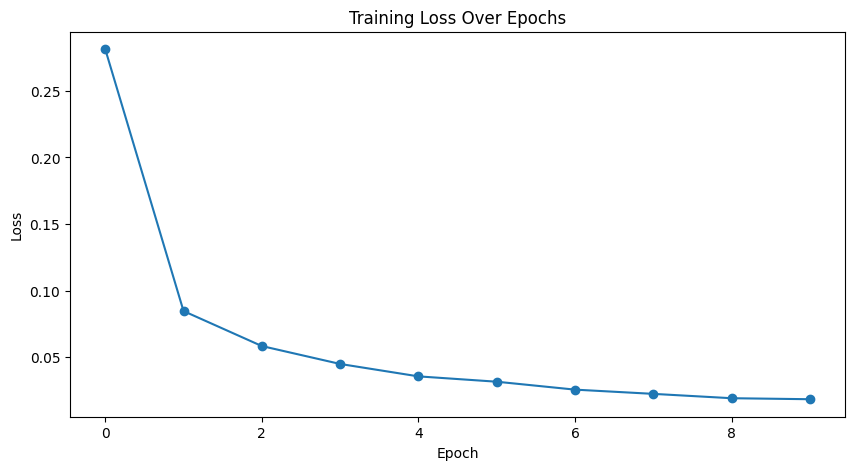

Training accuracy: 99.40%
Test accuracy: 98.31%


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Set device
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Device in use: {device}")

# 1. Data loading and transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

batch_size = 64
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# 2. Define the LeNet-5 network
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.tanh(self.conv1(x)))
        x = self.pool(torch.tanh(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the network
model = LeNet5().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training settings
num_epochs = 10
loss_history = []

# 3. Training Loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Loss calculation
        loss = criterion(outputs, labels)
        running_loss += loss.item()

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

    # Append the average loss of the epoch to loss_history
    avg_loss = running_loss / len(train_loader)
    loss_history.append(avg_loss)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}")

# 4. Plotting the Loss History
plt.figure(figsize=(10, 5))
plt.plot(loss_history, marker='o')  # Added marker to make points visible
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
model.eval()  # Set model to evaluation mode
correct_train = 0
total_train = 0
with torch.no_grad():
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

train_accuracy = 100 * correct_train / total_train
print(f"Training accuracy: {train_accuracy:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

test_accuracy = 100 * correct_test / total_test
print(f"Test accuracy: {test_accuracy:.2f}%")


The above code implements the LeNet-5 architecture. The network starts by convolving the 28x28 grayscale input image to extract features, using 6 filters in the first layer and 16 in the second. Each convolution is followed by average pooling, halving the spatial dimensions. The output is flattened and passed through three fully connected layers (120, 84, and 10 units), where each layer is activated by a Tanh function. The final layer outputs scores for each digit class (0–9), using cross-entropy loss and the Adam optimizer for training. This architecture captures key image features for effective digit classification.

Question 3

Importing Libraries

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import os


Data Loading and Transformation

In [4]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
data_dir = 'data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


Visualizing Sample Images

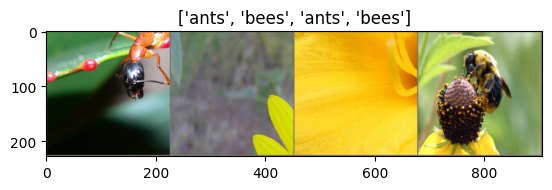

In [5]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)
inputs, classes = next(iter(dataloaders['train']))
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])


Training Function

In [6]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    best_model_wts = model.state_dict()
    best_acc = 0.0
    train_loss_history = []
    val_acc_history = []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)
        for phase in ['train', 'val']:
            model.train() if phase == 'train' else model.eval()
            running_loss, running_corrects = 0.0, 0
            for inputs, labels in dataloaders[phase]:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train': scheduler.step()
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
            if phase == 'train':
                train_loss_history.append(epoch_loss)
            else:
                val_acc_history.append(epoch_acc.item())
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()
        print()

    model.load_state_dict(best_model_wts)
    return model, train_loss_history, val_acc_history


Fine-tuning the Model

In [7]:
model_ft = models.resnet18(weights='IMAGENET1K_V1')
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)
model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

model_ft, train_loss_history_ft, val_acc_history_ft = train_model(
    model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25
)


Epoch 0/24
----------
train Loss: 0.5812 Acc: 0.6762
val Loss: 0.2436 Acc: 0.8693

Epoch 1/24
----------
train Loss: 0.5198 Acc: 0.7828
val Loss: 0.2856 Acc: 0.9020

Epoch 2/24
----------
train Loss: 0.6293 Acc: 0.7746
val Loss: 0.3062 Acc: 0.8366

Epoch 3/24
----------
train Loss: 0.5256 Acc: 0.7951
val Loss: 0.2748 Acc: 0.9150

Epoch 4/24
----------
train Loss: 0.4615 Acc: 0.8279
val Loss: 0.2883 Acc: 0.9020

Epoch 5/24
----------
train Loss: 0.4614 Acc: 0.8361
val Loss: 0.4469 Acc: 0.8627

Epoch 6/24
----------
train Loss: 0.4884 Acc: 0.8074
val Loss: 0.2642 Acc: 0.8889

Epoch 7/24
----------
train Loss: 0.3609 Acc: 0.8566
val Loss: 0.2464 Acc: 0.8954

Epoch 8/24
----------
train Loss: 0.3468 Acc: 0.8689
val Loss: 0.2488 Acc: 0.9085

Epoch 9/24
----------
train Loss: 0.3131 Acc: 0.8484
val Loss: 0.2181 Acc: 0.9281

Epoch 10/24
----------
train Loss: 0.2895 Acc: 0.8689
val Loss: 0.2205 Acc: 0.9216

Epoch 11/24
----------
train Loss: 0.3041 Acc: 0.8566
val Loss: 0.2366 Acc: 0.9216

Ep

Plotting Training Loss and Validation Accuracy for Fine-tuning

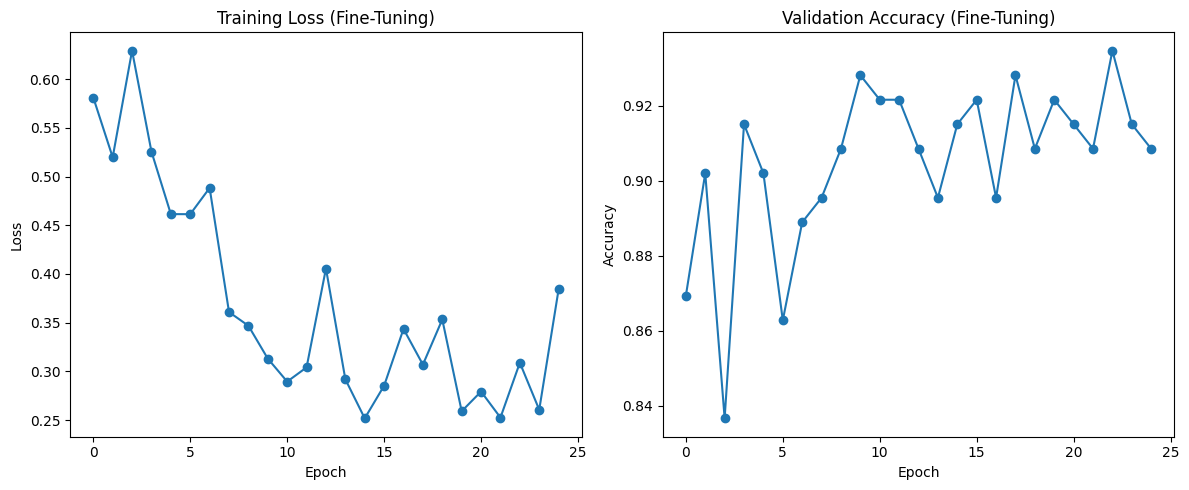

In [8]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_history_ft, marker='o')
plt.title("Training Loss (Fine-Tuning)")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(val_acc_history_ft, marker='o')
plt.title("Validation Accuracy (Fine-Tuning)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()


Fine-Tuning (model_ft):

* Training Accuracy: Started at 67.62% and reached a high of 90.57%.
* Validation Accuracy: Peaked at 93.46% around epoch 22.
* Training Loss: Initially 0.5812, with a final value of 0.3843.
* Validation Loss: Varied slightly, ending at 0.2471.

Fine-tuning showed steady improvement in accuracy but had fluctuating losses.

Using the Model as a Feature Extractor

In [9]:
model_conv = models.resnet18(weights='IMAGENET1K_V1')
for param in model_conv.parameters():
    param.requires_grad = False
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)
model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

model_conv, _, val_acc_history_conv = train_model(
    model_conv, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=25
)


Epoch 0/24
----------
train Loss: 0.5897 Acc: 0.6598
val Loss: 0.2169 Acc: 0.9346

Epoch 1/24
----------
train Loss: 0.4421 Acc: 0.8033
val Loss: 0.1907 Acc: 0.9412

Epoch 2/24
----------
train Loss: 0.4581 Acc: 0.7787
val Loss: 0.2214 Acc: 0.9281

Epoch 3/24
----------
train Loss: 0.6765 Acc: 0.6926
val Loss: 0.4927 Acc: 0.8105

Epoch 4/24
----------
train Loss: 0.4759 Acc: 0.8156
val Loss: 0.2029 Acc: 0.9346

Epoch 5/24
----------
train Loss: 0.4603 Acc: 0.8238
val Loss: 0.2603 Acc: 0.9150

Epoch 6/24
----------
train Loss: 0.5516 Acc: 0.7828
val Loss: 0.1897 Acc: 0.9477

Epoch 7/24
----------
train Loss: 0.3971 Acc: 0.8115
val Loss: 0.2455 Acc: 0.9281

Epoch 8/24
----------
train Loss: 0.3776 Acc: 0.8238
val Loss: 0.2000 Acc: 0.9477

Epoch 9/24
----------
train Loss: 0.3833 Acc: 0.8443
val Loss: 0.1782 Acc: 0.9542

Epoch 10/24
----------
train Loss: 0.2789 Acc: 0.8975
val Loss: 0.1908 Acc: 0.9608

Epoch 11/24
----------
train Loss: 0.3793 Acc: 0.8279
val Loss: 0.2621 Acc: 0.9020

Ep

Plotting Validation Accuracy for Feature Extraction

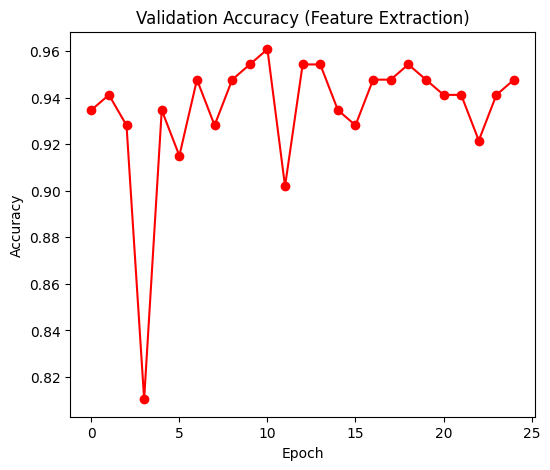

In [10]:
plt.figure(figsize=(6, 5))
plt.plot(val_acc_history_conv, marker='o', color='r')
plt.title("Validation Accuracy (Feature Extraction)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()


Feature Extraction (model_conv):

* Training Accuracy: Started at 65.98% and gradually increased to 87.7%.
* Validation Accuracy: Reached a high of 96.08% around epoch 10.
* Training Loss: Dropped from 0.5897 to 0.3520 by the end.
* Validation Loss: Reached a low of 0.1782, indicating stable generalization performance.

Feature extraction achieved higher validation accuracy sooner, showing effective generalization without overfitting due to the frozen layers, with stable training dynamics.

Visualizing Model Predictions

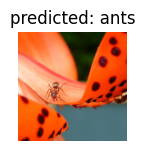

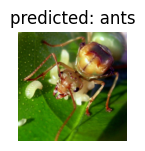

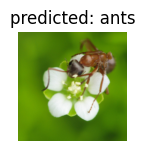

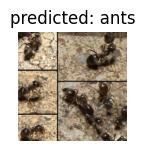

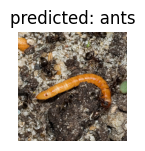

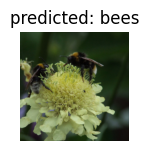

In [11]:
def visualize_model(model, num_images=6):
    model.eval()
    images_so_far = 0
    fig = plt.figure()
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])
                if images_so_far == num_images:
                    return
visualize_model(model_ft)  # or visualize_model(model_conv)
